# Определение закономерности успешности игры. 

Интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем рекламную кампанию на 2017-й.


## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Откройте файл с данными и изучите общую информацию


In [1]:
# Импортируем все необходимое
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_games = pd.read_csv('/datasets/games.csv')
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

Мы импортировали cvs файл, нужные нам библиотеки и метод `display` для вывода на печать таблиц.

In [2]:
display(data_games.head(10))

data_games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Таблица имеет 16715 строк и 11 столбца. В 6 столбцах есть пропущенные значения. Данные имеют следующие типы данных:
- float
- object

Каждая строка содержит информацию о разных видеоиграх на различных игровых консолях. Некоторые проблемы в предобработке данных, которые нужно решить: пропущенные значения, тип данных и приведение к нижнему регистру. Для дальнейшего анализа все столбцы несут свою определенную ценность.

### Шаг 2. Предобработка данных


#### Шаг 2.1. Предобработка  наименований столбцов

In [3]:
data_games.columns = data_games.columns.str.lower()
display(data_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы преобразовали названия столбцов к нижнему регистру с помощью метода `str.lower()`. Теперь точно не будем делать опечаток в последующих операциях по столбцам. 

#### Шаг 2.2. Обработка пропусков

In [4]:
# узнаем количество пропусков
data_games.isna().sum() #узнаем общее количество пропусков в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропусков достаточно много, нужно разбираться, есть несколько вариантов:
- Их замена уместна и обоснована
- Замена пропусков не имеет смысла для анализа
- Нету подходящего значения на замену. В этом случае правильно оставить эти значения пустыми.

In [5]:
#Удалим пропущенные значения
data_games = data_games.dropna(axis='index', how='any', subset=['name']) 
data_games = data_games.dropna(axis='index', how='any', subset=['genre']) 

In [6]:
# узнаем изначальное колличество пропусков
print('Пропусков до:', data_games['year_of_release'].isna().sum())

#заполним пропуски с группировкой по одной переменной
for platform in data_games['platform'].unique(): 
    median = data_games.loc[data_games['platform'] == platform, 'year_of_release'].median()
    data_games.loc[(data_games['year_of_release'].isna()) & (data_games['platform'] == platform), 'year_of_release'] = median

#проверяем как сработала замена    
print('Пропусков после:', data_games['year_of_release'].isna().sum())

Пропусков до: 269
Пропусков после: 0


In [7]:
#Cоздадим резервную копию нашей базы, для того что бы узнать влияют ли оценки на продажи
df = data_games.copy(deep=True)
df = df.dropna(axis='index', how='any', subset=['user_score']) 
df = df[df.user_score != 'tbd']
df['total_revenue'] = (df['na_sales'] + df['eu_sales'] + df ['jp_sales'] + df['other_sales'])
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

print(df['total_revenue'].corr(df['user_score']))  
print(df['total_revenue'].corr(df['critic_score']))  

0.08817911987579136
0.23696225509682375


In [8]:
#Заменим значение tbd, на None
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = None

print(data_games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' None '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [9]:
#Проверим как все сработало
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

### Вывод

Мы обрабатывали пропуска типа NaN. NaN замещает отсутствующее в ячейке число и принадлежит к типу float. Обработка пропусков была произведена следующими способами:

- `dropna`

В столбцах **name, genre** было очень маленькое количество пропусков. Около одной сотой процента. Удаление строк не повлияет на дальнейший анализ данных. К тому же невозможно точно угадать название игры или жанр исходя из остальных данных. Причиной возникновения данных пропусков могут быть разные, к примеру ошибка при вводе данных, потеря данных или техническая ошибка при выгрузке. 

- `median`

В столбце **year_of_release** мы обработали пропуски с помощью медианы столбца, с группировав данные по названию игровой приставки. Это логичный шаг, так как разные игровые консоли выпускались и пользовались спросом в разный временной промежуток. Да, бывают топовые видео игры, которые выпускаются и для более старых игровых консолях, но это скорее исключение, чем правило. 

- `не стали обрабатывать пропуски`

В столбцах **critic_score и user_score** мы сначала хотели заменить пропуски медианой сгруппировав по числу продаж по всем регионам сразу. Основываясь на то, что чем рейтинг выше, тем продажи больше. Мы решили это проверить сразу, в результате создали копию нашей таблицы (что бы ничего не сломать) и посчитали коэффициент Пирсона между оценкой и продажами. Коэффициент оказался низким. Это показывает на очень слабую взаимосвязь между оценкой и продажами. Следовательно, такой способ обработки пропусков мы отвергли. Если группировать данные по жанрам или названию игры, то в первом алгоритме также не имеет чувствительности к пропускам, во втором случае вылезала ошибка, так как недостаточно заполненных оценок по строкам с названием игр. Если бы в таблице была колонка по названию производителя игры, то возможно имел бы смысл сгруппировать по нему. Но так как в итоге ни один из алгоритмов в этой таблице не имеет чувствительности к пропускам, обрабатывать мы их не будет. Необоснованная обработка пропусков может негативно повлиять на корреляционный анализ или стат-тесты. Аналогичный случай со столбцом **rating **. 

Также мы нашли значение **tbd** в столбце **user_score**. Данная аббревиатура означает, что данной оценки пока еще нет/ ожидается в будущем. Это может быть связанно с тем, что игра еще слишком новая или не очень популярная, поэтому пользователи оценку свою еще не дали. Данное значение мы поменяли на None. Данный столбец можно сделать с типом данных float и корреляции ничего не будет мешать. Если заполнить это значение каким-то другим числом или медианой столбца, то результат корреляции может быть искажен, не будем так рисковать.  


#### Шаг 2.3. Замена типа данных

In [10]:
#Поменяем типы данных
data_games['year_of_release'] = data_games['year_of_release'].astype('int')
data_games['user_score'] = pd.to_numeric(data_games['user_score'])

data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Вывод

Мы поменяли тип данных в столбце **year_of_release**, теперь он стал целочисленным. Ведь неправильно будет, что в целом году будет плавающая точка. 

Тип данных в столбце **user_score** мы поменяли с object на float, методом `pd.to_numeric` теперь можно запросто считать корреляцию и проводить проверку гипотез по этмоу столбцу

Тип данных в столбце **critic_score** правильнее было бы поменять на int, но так как мы не стали удалять nan (пропуска), то это не имеет возможности реализоваться. Но даже с типом Float последующий анализ останется верным и правильным.

#### Шаг 2.4. Сумарные продажи

In [11]:
#Создадим новый столбец
data_games['total_sales'] = (data_games['na_sales'] + data_games['eu_sales'] \
                             + data_games['jp_sales'] + data_games['other_sales'])
display(data_games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Вывод

Мы проверили математические операции со столбцами и теперь знаем суммарные продажи определенной игры по всему миру. Это нам поможет в дальнейшем проводить исследовательский анализ данных.

### Шаг 3. Исследовательский анализ данных

#### Шаг. 3.1. Количество новых игр по годам.

In [12]:
#Узнаем кол-во новинок в разные года
top_games_year = data_games.pivot_table(index = 'year_of_release', values = ['name'], aggfunc = 'count')
top_games_year.columns = ['count_game']
display(top_games_year.sort_values('year_of_release', ascending=False).head(15))

,count_game
year_of_release,
2016,502
2015,606
2014,582
2013,552
2012,653
2011,1161
2010,1302
2009,1476
2008,1457


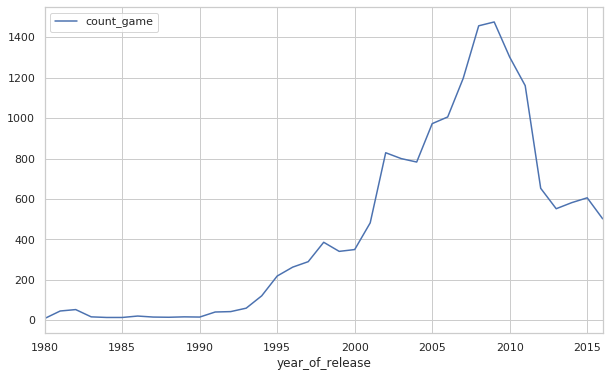

In [35]:
# построим линейный график
top_games_year.plot(grid = True)
plt.show()



### Вывод

В сводной таблице, а особенно на линейном графике видно, что пик выхода новых игр приходился на 2008-2009 года. Дальнейший спад новинок, возможно обусловлен тем, что с 2010 года стали массово набирать популярные обороты сенсорные смартфоны (к примеру iphone 4). Также появилось большое кол-во многопользовательских игр, а игры с задумкой пройти режим "компания" стали потихонечку угасать. Но не будем забывать про виртуальную реальность, шлемы и очки в скором будущем, возможно это будет прорыв в росте продаж видео игр, и они смогут пробить исторический максимум "ракетой" вверх на графике. 

Все периоды для прогноза на 2017 год, конечно же не важны.

#### Шаг 3.2. Распределение продаж игр по годам

In [14]:
#Найдем топ10 платформ по сумме продаж видео игр
top_sales_game_platform = data_games.pivot_table(index = ['platform',], values = ['total_sales'], aggfunc = 'sum')
top_sales_game_platform = top_sales_game_platform.query('total_sales > 259')
display(top_sales_game_platform.sort_values('total_sales', ascending=False))


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [15]:
#Узнаем продажи каждой платформы по годам
top_sales_game_platform_year = data_games.pivot_table(index = ['platform', 'year_of_release'], \
                                                      values = ['total_sales'], aggfunc = 'sum')
display(top_sales_game_platform_year.head(20))


total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   39.38
         1983                    5.84
         1984                    0.27
         1985                    0.45
         1986                    0.67
         1987                    1.94
         1988                    0.74
         1989                    0.63
3DO      1994                    0.02
         1995                    0.08
3DS      2011                   63.20
         2012                   51.36
         2013                   57.76
         2014                   43.76
         2015                   27.78
         2016                   15.14
DC       1998                    3.38
         1999                    5.16

In [16]:
#Найдем платформы по суммарным продажам за последние 10 лет
top_sales_game_platform_year = top_sales_game_platform_year.query('year_of_release > 2005')

top_sales_game_platform_year2 = top_sales_game_platform_year.pivot_table(index = ['platform'], \
                                                                         values = ['total_sales'], aggfunc = 'sum')
display(top_sales_game_platform_year2.sort_values('total_sales', ascending=False))

,total_sales
platform,
X360,963.17
PS3,939.65
Wii,907.51
DS,658.69
PS4,314.14
PS2,265.80
3DS,259.00
PSP,243.15
PC,167.18


In [17]:
#Посмотрим как продавались игры среди топ-10 платформ по продажам с 2006 по 2016г.г.
top_sales_game_platform_year3 = top_sales_game_platform_year. \
query('platform ==("PS3","X360","PS4","3DS","Wii","DS","PS2","PSP","PC","XOne")')

top_sales_game_platform_year4 = top_sales_game_platform_year3.pivot_table(index = ['year_of_release'],\
                                                                          columns = ['platform'], values = 'total_sales', \
                                                                          aggfunc = 'sum')

display(top_sales_game_platform_year4)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,X360,XOne
year_of_release,,,,,,,,,,
2006,NaN,119.81,2.85,103.42,20.96,NaN,55.32,137.15,51.62,NaN
2007,NaN,146.94,9.28,75.99,73.19,NaN,46.93,152.77,95.41,NaN
2008,NaN,148.65,12.42,53.90,118.52,NaN,34.55,171.32,135.26,NaN
2009,NaN,119.54,16.91,26.40,130.93,NaN,42.30,223.30,120.29,NaN
2010,NaN,85.02,28.04,5.64,142.17,NaN,35.04,127.95,180.21,NaN
2011,63.20,26.18,35.03,0.45,165.09,NaN,17.82,59.65,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,21.71,99.74,NaN
2013,57.76,1.54,12.38,NaN,113.25,25.99,3.14,8.59,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,3.75,34.74,54.07


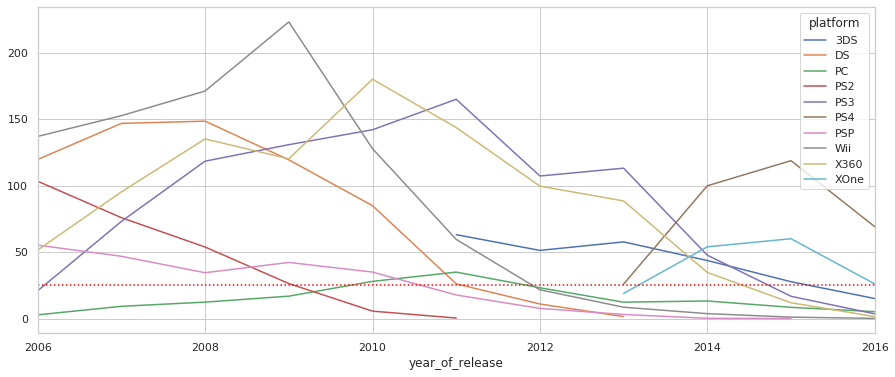

In [36]:
#Построим график распределения по годам продаж с разных платформ
top_sales_game_platform_year4.plot(figsize=(15,6), grid=True)
plt.axhline(25, linestyle = ':', color = 'red')
plt.show()

### Вывод

За основу мы взяли топ 10 платформ которые показали наибольшие суммарные продажи игр за последние 10 лет. В рейтинге по-прежнему видно, что исторический максимум был 08-09 годах, далее продажи активно падают, на это есть свои причины. Что бы определить время жизни платформы нам помогла сводная таблица и линейный график. Считать время жизни всех платформ этого графика по одной границе в 25 (пунктирная линия в графике) неправильно. Из-за спада продаж от 08 до 16 года более чем на 80%, то для каждого года и платформы, должна быть своя граница существенных продаж. К тому же с каждым годом, новые платформы будут заменять быстрее старые, это связанно с технологическим прогрессом в мире. 

За актуальный период предлагаем взять период с 2013 по 2016 года. Этот период, даст более правильную динамику продаж, для прогнозирования на 2017 год. К тому же в 2013 году вышли такие гиганты на момент 2016 года, как PS4 и XOne.

#### Шаг 3.3.

In [19]:
#Сделаем срез по актуальному периоду
сurrent_data_games = data_games.query('year_of_release >= 2013')
display(сurrent_data_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [20]:
#Узнаем лидеров продаж
sales_platform = сurrent_data_games.pivot_table(index = ['platform'], \
                                                      values = ['total_sales'], aggfunc = 'sum')
display(sales_platform.sort_values('total_sales', ascending=False))

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,144.44
X360,136.80
WiiU,64.63
PC,39.43
PSV,33.25
Wii,13.66


По продажам лидируют платформы: **PS4, PS3, XOne, 3DS, X360**

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2013,57.76,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


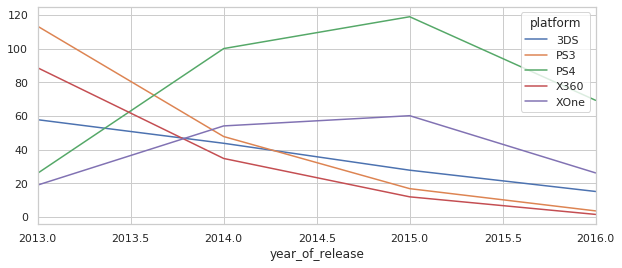

In [37]:
#построим распределение по годам среди наших лидеров
top_sales_platform = сurrent_data_games.query('platform ==("PS3","X360","PS4","3DS","XOne")')

top_sales_platform2 = top_sales_platform.pivot_table(index = ['year_of_release'],\
                                                                          columns = ['platform'], values = 'total_sales', \
                                                                          aggfunc = 'sum')

display(top_sales_platform2)

top_sales_platform2.plot(figsize=(10,4), grid=True)
plt.show()


### Вывод

Мы выбрали пять потенциально прибыльных платформ из нашего предыдущего рейтинга и посмотрели на линейном графике динамику продаж на этих платформах. У PS3 и X360 замечен резкий спад с 2013 по 2014 год, связано это с выходом старших поколений платформ. PS4 и XOne на старте продаж показали двух годичный рост, далее с 2015 года начинается спад, это может говорить о том, что в ближайшем будущем будет новое поколение приставок. 3DS показывает более плавный и равномерный спад.  

Эти пять платформ дальше и будем анализировать. 

#### Шаг 3.4. «Ящик с усами» по глобальным продажам игр.

,platform,total_sales
16,PS3,21.05
23,X360,16.27
31,PS4,14.63
33,3DS,14.60
42,PS4,12.62
47,3DS,11.68
60,X360,10.24
69,PS3,9.36
72,X360,9.18
77,PS4,8.58


count    1481.000000
mean        0.632093
std         1.451239
min         0.010000
25%         0.050000
50%         0.170000
75%         0.570000
max        21.050000
Name: total_sales, dtype: float64


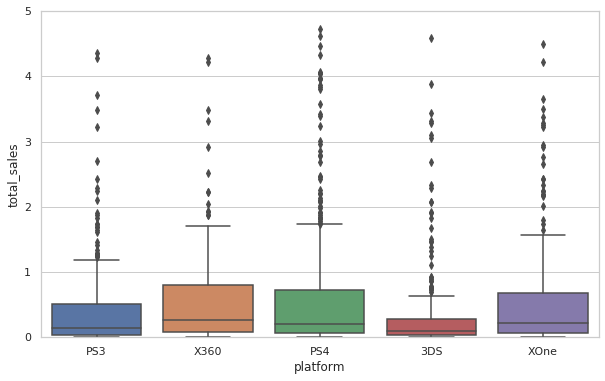

In [38]:
#Сделаем необходимую таблицу
сurrent_data_games_top5 = сurrent_data_games.query('platform ==("PS3","X360","PS4","3DS","XOne")')
data_games_top5 = сurrent_data_games_top5[['platform', 'total_sales']]
display(data_games_top5.head(10))
print(data_games_top5['total_sales'].describe())

#Посмтроим диаграмму размаха
sns.set(rc={'figure.figsize':(10,6)}, style='whitegrid')
sns.boxplot(x='platform', y='total_sales', data = data_games_top5)
plt.ylim(0,5)
plt.show()


### Вывод

Мы построили диаграммы размаха продаж наших топ5 платформ, в основном наиболее частые продажи варьируются в диапазоне от 100 до 600 тысяч копий. Более активные продажи видны на платформе X360 и PS4, менее активные на 3DS. "Ящик с усами" нужен для того, чтобы посмотреть выбросы в значениях. Выбросов достаточно много, они начинаются от 600 тысяч по платформе 3DS, а на топовых платформах X360 и PS4 в районе 1,7 млн копий. Выбросы связаны с наиболее популярными играми, которые полюбили за долгое время геймеры всего мира.

#### Шаг 3.6. Взаимосвязь продаж и отзывов 

Коэф Пирсона между продажими и оценкой критиков: 0.406567902061781
Коэф Пирсона между продажими и оценкой пользователей: -0.031957110204556424


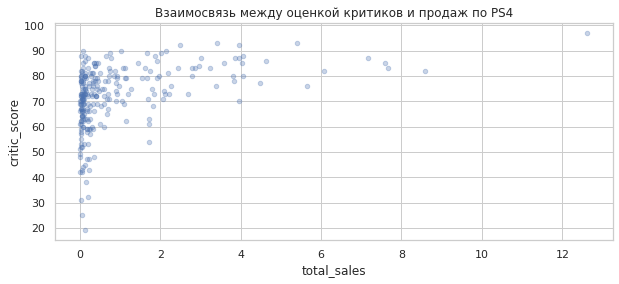

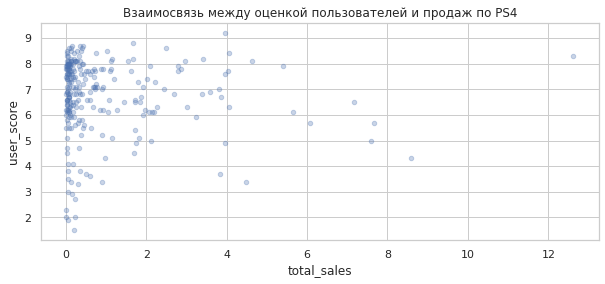

In [23]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

#Сделаем срез по одной платформе из топ5
platform_PS4 = сurrent_data_games_top5.query('platform ==("PS4")')

#Построим диаграммы рассеиния
platform_PS4.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(10,4), \
                  title = 'Взаимосвязь между оценкой критиков и продаж по PS4')
platform_PS4.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(10,4), \
                  title = 'Взаимосвязь между оценкой пользователей и продаж по PS4')

#Посчитаем коэфицент пирсона
print('Коэф Пирсона между продажими и оценкой критиков:', \
      platform_PS4['total_sales'].corr(platform_PS4['critic_score']))
print('Коэф Пирсона между продажими и оценкой пользователей:', \
      platform_PS4['total_sales'].corr(platform_PS4['user_score']))

### Вывод

На диаграмме рассеивания видно, что высокие оценки в основном преобладают среди невысоких продаж. Так как такие продажи и преобладают на каждой платформе. Оценки критиков немного больше влияют на сумму продаж, чем пользователей. Это видно и на диаграмме, и по значению коэффициента Пирсона. В одном случае (оценки критиков) равны коэффициенту 0,4 - что в принципе показывает некую небольшую взаимосвязь, а в другом случае (оценки пользователей) равны коэф -0,03 - число очень близко к нулю, значит зависимость совершено не видна. 

По другим платформам можно сделать точно такой же вывод, так как диапазоны наиболее частых продаж у всех примерно одинаковые. 

Общий вывод таков - оценки критиков в отличии от оценки пользователей больше влияют на количество продаж, но сильную взаимосвязь все равно не показывают. Преобладания влияния оценки критиков может быть обосновано тем, что критики наиболее грамотно и с профессиональной точкой зрения подходят к вопросу рейтинга, когда как пользователи могут поставить разные рейтинги по своим личным причинам.




#### Шаг 3.7. Распределение продаж игр по жанрам


In [24]:
#найдем топ жанры по продажам
top_genre_sales = сurrent_data_games_top5.pivot_table(index = ['genre'], \
                                                      values = ['total_sales'], aggfunc = ['sum', 'mean', 'median'])
top_genre_sales.columns = ['sum_sales', 'mean_sales', 'median_sales']
display(top_genre_sales.sort_values('sum_sales', ascending=False))

,sum_sales,mean_sales,median_sales
genre,,,
Action,286.36,0.548582,0.140
Shooter,216.29,1.481438,0.615
Sports,142.50,0.833333,0.360
Role-Playing,127.86,0.691135,0.180
Misc,43.57,0.444592,0.130
Racing,31.55,0.485385,0.180
Fighting,27.91,0.443016,0.150
Platform,22.88,0.486809,0.240
Adventure,18.68,0.168288,0.060


### Вывод

Самые популярные жанры это **Action, Shooter, Sports, Role-Playing** они сильно опережают другие жанры по продажам, в 3, 4 и даже в десятки раз. Жанр **Action** отличается относительно не большим средним числом продаж, в отличии от других жанров в топе. При этом у него самые высокие суммарные продажи. Это говорит о том, что в этом жанре больше всего было выпущено разных игр. 

Внизу рейтинга стоят жанры **Strategy и Puzzle**. Вместе они даже 1% от общей суммы продаж не могут забрать. Жанры видимо для только определенного круга пользователей. 


### Шаг 4. Портрет пользователя каждого региона

#### Шаг 4.1. Доли продаж игр на разных платформах по регионам

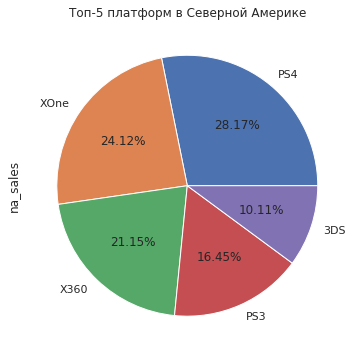

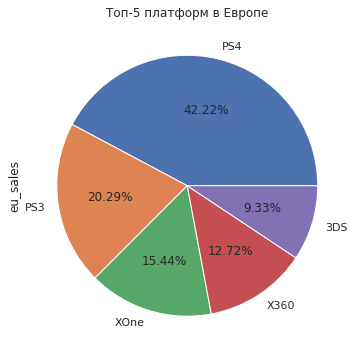

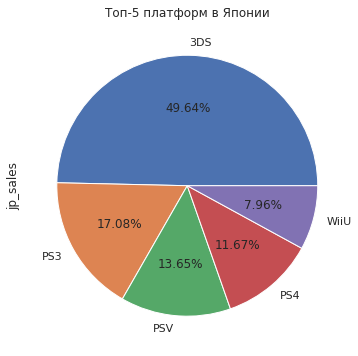

In [41]:
#Сделаем нужную сводную таблицу
sales_platform_all = сurrent_data_games.pivot_table(index='platform',\
                                                    values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Cоздадим круговые диграммы с обозначеним доли в %
sales_platform_all.sort_values(by= 'na_sales',\
                              ascending=False).head(5).plot(y='na_sales', kind='pie',\
                                            title='Топ-5 платформ в Северной Америке', autopct='%1.2f%%', legend=False)

sales_platform_all.sort_values(by= 'eu_sales', ascending=False).head(5).plot(y='eu_sales', kind='pie',\
                                            title='Топ-5 платформ в Европе', autopct='%1.2f%%', legend=False)

sales_platform_all.sort_values(by= 'jp_sales', ascending=False).head(5).plot(y='jp_sales', kind='pie',\
                                            title='Топ-5 платформ в Японии', autopct='%1.2f%%', legend=False)
plt.show()

### Вывод

Самые популярные платформы в Северной Америке и Европе очень схожи. На первом месте у двух регионов PS4, да и в целом топ5 состоит из одинаковых платформ. Единственное различие в том, что в Америке чуть больше любят Xbox чем в Европе, возможно это связано с тем, что microsoft располагается в Америке и рекламная компания из-за этого немного лучше. Еще различие у этих двух регионов в том, что в Америке платформы распределены +- в равно долевых пропорциях, тогда как в Европе PS4 имеет сильно большую долю среди других платформ. 

Япония совершенно не похожа на предыдущие регионы. Во-первых в топ5 платформ входят совсем иные, полностью пропал Xbox, появились такие платформы как PSV и Wiiu. Уверенное первое место, практически с 50% долей занимает платформа 3DS. Это связанно с тем, что 3DS разработана в Японии, да и старт продаж в 2011 году данной консоли начался именно там.


#### Шаг 4.2. Доли продаж игр в разных жанрах по регионам

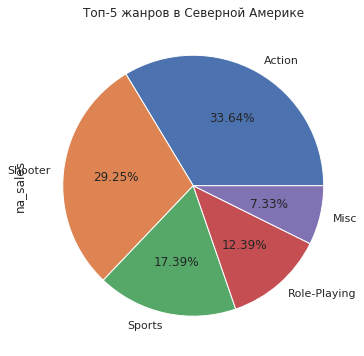

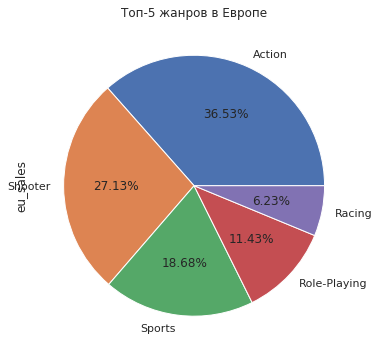

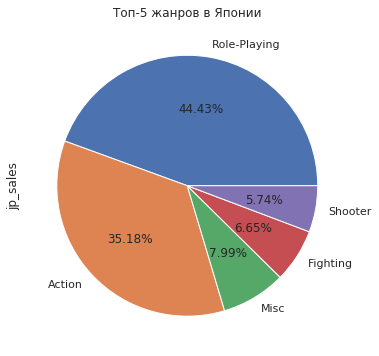

In [42]:
#Сделаем нужную сводную таблицу
sales_genre_all = сurrent_data_games.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Cоздадим круговые диграммы с обозначеним доли в %
sales_genre_all.sort_values(by= 'na_sales',\
                              ascending=False).head(5).plot(y='na_sales', kind='pie',\
                                                 title='Топ-5 жанров в Северной Америке', autopct='%1.2f%%', legend=False)

sales_genre_all.sort_values(by= 'eu_sales', ascending=False).head(5).plot(y='eu_sales', kind='pie',\
                                                title='Топ-5 жанров в Европе', autopct='%1.2f%%', legend=False)

sales_genre_all.sort_values(by= 'jp_sales', ascending=False).head(5).plot(y='jp_sales', kind='pie',\
                                                title='Топ-5 жанров в Японии', autopct='%1.2f%%', legend=False)
plt.show()

### Вывод

По жанрам ситуация очень похожа на предыдущий анализ платформ. Северная Америка по-прежнему очень схожа с Европой. Люди в этих континентах предпочитают одинаковые жанры и скорее всего игры в целом. Сильно лидируют Action и Shooter. Также пользователи не забывают про спортивные игры (3 место в рейтинге). Япония выделяется топовым для себя жанром Role-Playing, возможно именно в этот жанр любят играть на 3ds, так как доли у них практически одинаковые. Мы думаем, что это связано с популярностью Аниме в этой стране. Жанр 'ролевые игры' часто встречается именно в различных Аниме.

#### Шаг 4.3. Взаимосвязь рейтинга ESRB на продажи по каждому региону

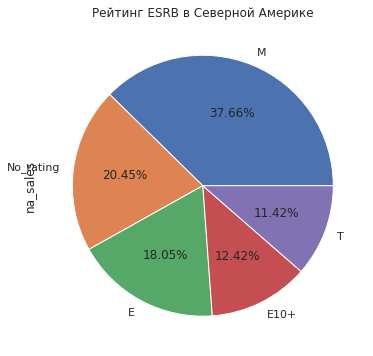

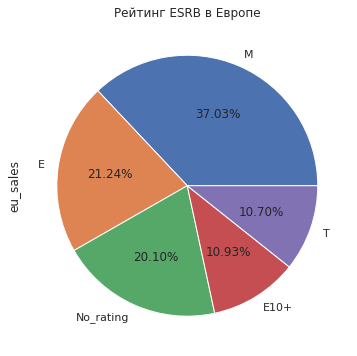

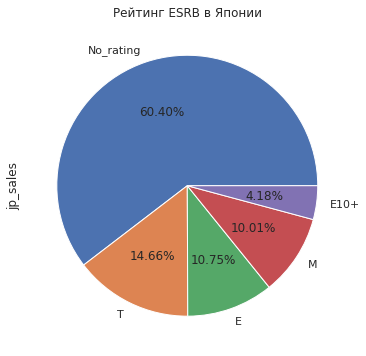

In [43]:
#Заменим отсутствующие значения
сurrent_data_games['rating'] = сurrent_data_games['rating'].fillna("No_rating")
#Сделаем нужную сводную таблицу
sales_rating_all = сurrent_data_games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Cоздадим круговые диграммы с обозначеним доли в %
sales_rating_all.sort_values(by= 'na_sales',\
                              ascending=False).head(5).plot(y='na_sales', kind='pie',\
                                                title='Рейтинг ESRB в Северной Америке', autopct='%1.2f%%', legend=False)

sales_rating_all.sort_values(by= 'eu_sales', ascending=False).head(5).plot(y='eu_sales', kind='pie',\
                                                 title='Рейтинг ESRB в Европе', autopct='%1.2f%%', legend=False)

sales_rating_all.sort_values(by= 'jp_sales', ascending=False).head(5).plot(y='jp_sales', kind='pie',\
                                               title='Рейтинг ESRB в Японии', autopct='%1.2f%%', legend=False)
plt.show()

### Вывод

Продажи по рейтингу ESRB среди Северной Америкой и Европой по-прежнему очень схожи. Можно уверенно говорить, что люди, которые живут в этих краях играют примерно в одинаковые игры, на одинаковых платформах. Наибольшая доля продаж присутствует среди рейтинга "М", который обозначает Mature - для взрослых. Материалы игры не подходят для подростков младше 17 лет. Во многих Экшенах и Шутерах присутствует некое насилие, убийства, взрывы, которые запрещены/ не рекомендованы для детей. 

В Японии преобладает рейтинг "T", который означает Teen - подростки. Игры подходят для лиц от 13 лет и старше. У них и другие жанры как раз таки были в топе. 

Из всех выше предоставленных анализов, можно сделать следующий портрет наиболее частого геймера:

- Северная Америка: 

Геймеры в этой стране, это люди старше 17 лет, которые любят PS и Xbox. Часто играют в различные Экшены и Шутеры. 

- Европа: 

Геймеры в этой стране больше предпочли PS чем Xbox, но про него тоже не забывают. Обычно это люди старше 17 лет, которые любят играть в различные Экшены и Шутеры

- Япония:

Геймеры в этой стране полюбили свою родную платформу под названием 3DS, обычно это подростки от 13 лет и старше. В свободное время от учебы они отдают предпочтение таким жанрам, как ролевые игры и экшены. 

### Шаг 5. Проверка гипотез

#### Шаг 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые или нет

In [28]:
user_score_paltform = сurrent_data_games[['platform', 'user_score']]

#Создадим необходимые нам срезы
user_score_xone = user_score_paltform.query('platform == "XOne"')
user_score_pс = user_score_paltform.query('platform == "PC"')

#Удалим пропущенные значения, для корректной работы гипотез
user_score_xone = user_score_xone.dropna(axis='index', how='any', subset=['user_score']) 
user_score_pс = user_score_pс.dropna(axis='index', how='any', subset=['user_score'])

display(user_score_xone)
display(user_score_pс)

,platform,user_score
165,XOne,7.9
179,XOne,5.4
242,XOne,6.4
270,XOne,6.2
373,XOne,4.1
...,...,...
16544,XOne,6.8
16597,XOne,6.0
16630,XOne,8.2
16643,XOne,6.6


,platform,user_score
458,PC,3.9
1095,PC,7.9
1351,PC,2.2
1437,PC,6.0
1530,PC,5.4
...,...,...
16456,PC,8.3
16463,PC,6.8
16509,PC,7.9
16518,PC,1.4


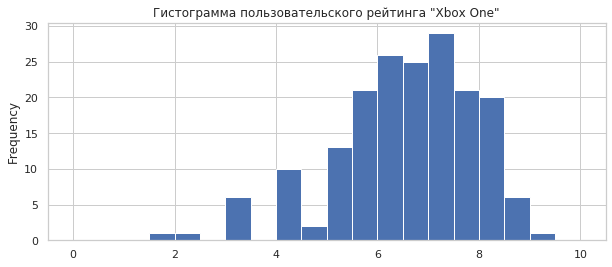

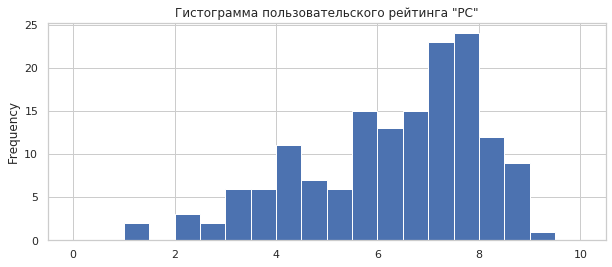

In [44]:
#строим гистрограммы пользовательского рейтинга
user_score_xone['user_score'].plot(kind='hist', bins=20, range=(0,10), figsize=(10,4), \
                                   title='Гистограмма пользовательского рейтинга "Xbox One"')
plt.show()
user_score_pс['user_score'].plot(kind='hist', bins=20, range=(0,10), figsize=(10,4), \
                                   title='Гистограмма пользовательского рейтинга "PC"')
plt.show()

In [30]:
#Найдем дисперсии значений наших таблиц
var_user_score_xone = np.var(user_score_xone['user_score'], ddof=1)
var_user_score_pс = np.var(user_score_pс['user_score'], ddof=1)

print('дисперсия пользовательского рейтинга xone:', var_user_score_xone)
print('дисперсия пользовательского рейтинга PC:', var_user_score_pс)

дисперсия пользовательского рейтинга xone: 1.9069968429360695
дисперсия пользовательского рейтинга PC: 3.035892752408882


In [31]:
# Проверяем гипотезу
from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(user_score_xone['user_score'], user_score_pс['user_score'], equal_var = False)

print('Средний пользовательский рейтинг Xbox One:', user_score_xone['user_score'].mean())
print('Средний пользовательский рейтинг PC:', user_score_pс['user_score'].mean())

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.2696774193548395
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


 ### Вывод

Нулевая гипотеза - средний рейтинг двух платформ равен.

Средний пользовательский рейтинг между PS4 и XOne одинаков. Это еще раз показывает на то, что эти две платформы прямые конкуренты друг другу во многих регионах мира. Они стараются делать качественные платформы и качественные игры, от этого оценки пользователей выше среднего. 

#### Шаг 5.2. Средние пользовательские рейтинги жанров Action и Sports разные или нет. 

In [32]:
user_score_genre = сurrent_data_games[['genre', 'user_score']]

#Создадим необходимые нам срезы
user_score_action = user_score_genre.query('genre == "Action"')
user_score_sports = user_score_genre.query('genre == "Sports"')

#Удалим пропущенные значения, для корректной работы гипотез
user_score_action = user_score_action.dropna(axis='index', how='any', subset=['user_score']) 
user_score_sports = user_score_sports.dropna(axis='index', how='any', subset=['user_score'])

display(user_score_action)
display(user_score_sports)

,genre,user_score
16,Action,8.2
23,Action,8.1
42,Action,8.3
149,Action,9.1
165,Action,7.9
...,...,...
16597,Action,6.0
16652,Action,8.5
16654,Action,5.1
16660,Action,6.7


,genre,user_score
77,Sports,4.3
94,Sports,5.0
126,Sports,4.3
143,Sports,5.7
264,Sports,4.5
...,...,...
16142,Sports,8.8
16146,Sports,6.9
16450,Sports,4.5
16518,Sports,1.4


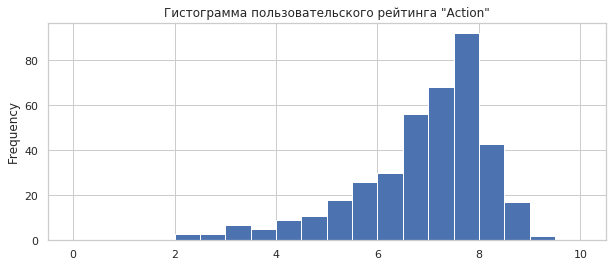

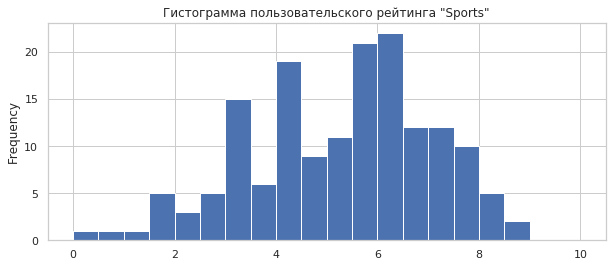

In [45]:
#строим гистрограммы пользовательского рейтинга
user_score_action['user_score'].plot(kind='hist', bins=20, range=(0,10), figsize=(10,4), \
                                   title='Гистограмма пользовательского рейтинга "Action"')
plt.show()
user_score_sports['user_score'].plot(kind='hist', bins=20, range=(0,10), figsize=(10,4), \
                                   title='Гистограмма пользовательского рейтинга "Sports"')
plt.show()

In [34]:
# Проверяем гипотезу
from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(user_score_action['user_score'], user_score_sports['user_score'])

print('Средний пользовательский рейтинг жанра Action:', user_score_action['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', user_score_sports['user_score'].mean())

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action: 6.836666666666666
Средний пользовательский рейтинг жанра Sports: 5.238124999999999
p-значение: 9.645978111716946e-28
Отвергаем нулевую гипотезу


### Вывод

Альтернативная гипотеза - средний рейтинг двух жанров отличается. 

Средний рейтинг жанра Action и Sport отличается друг от друга, на это нам указывает распределение на наших гистограммах и отвержение нулевой гипотезы. Сразу можно вспомнить, во что обычно любят играть геймеры из Америки и Европы - это экшен игры. Пользовательский рейтинг у этого жанра заслужил большего внимания и оценки, чем игры про спорт.
 

### Шаг 6. Общий вывод

Анализируя успешность игр и поведение пользователей, для рекламной компании на 2017 год, можно сказать о следующем:

* Очень сильно заметно падение спроса на видео игры за последние 8 лет, в связи с этим интернет магазину «Стримчик» будет не легко показывать хорошую финансовую отчетность в 2017 году. Советуем активно следить за последними новостями событий в мире видео игры, а особенно дат выпуска новых платформ, так как с приходом новых платформ видна положительная динамика продаж, на некоторый период. 


* Акцентировать внимание в первую очередь нужно на игры жанра Action и Shooter, игр в этих жанрах выпускаются разными производителями больше всего и они пользуются большой популярностью в Северной Америке и Европе. Также не стоит забывать про рынок Японии, он имеет свою приличную долю, там рекламу нужно настроить на жанр Role-Playing. 


* Лучшие платформы по всему миру это Xbox, PS и DS. Необходимо заранее, до выпуска новых поколений данных консолей, спланировать рекламную кампанию, на самые ходовые регионы продаж в мире. 


* Обращайте внимание на возвратные рейтинги игр, основной поток геймеров — это люди от 13 лет. Очень хорошие продажи показывают игры с рейтингов для взрослых и подростков. Думаем на эту категорию людей, нужно больше всего акцентировать внимания в продажах, они очень значимы. 

